# INTRODUCCIÓN

Para el presente proyecto, supondremos que trabajamos para como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Nuestra tarea es encontrar patrones en la información disponible. Buscamos comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Queremos encontrar tendencias en cómo se relacionan.

Analizaremos los datos de los competidores y probaremos una hipótesis sobre el impacto del clima en la frecuencia de los viajes.


## Paso 4. Análisis exploratorio de datos (Python)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df_trips = pd.read_csv("/datasets/project_sql_result_01.csv")

In [3]:
df_dropoff_location = pd.read_csv("/datasets/project_sql_result_04.csv")

In [4]:
df_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
df_dropoff_location.head(20)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [6]:
df_trips.dtypes

company_name    object
trips_amount     int64
dtype: object

In [7]:
df_trips["trips_amount"] = df_trips["trips_amount"].astype("float")

In [8]:
df_dropoff_location.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

Es más sencillo y versátil el tipo de datos "float", por ello cambiamos el tipo de datos en la columna "trips_amount" de "int64" a "float64". 

In [9]:
top_neighborhoods = df_dropoff_location.head(10)

In [10]:
print(top_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Como nuestro Dataset ya viene en orden, no es necesario ordenar los valores, solo tomaremos las 10 primeras filas.

In [11]:
company_trips = df_trips['trips_amount']

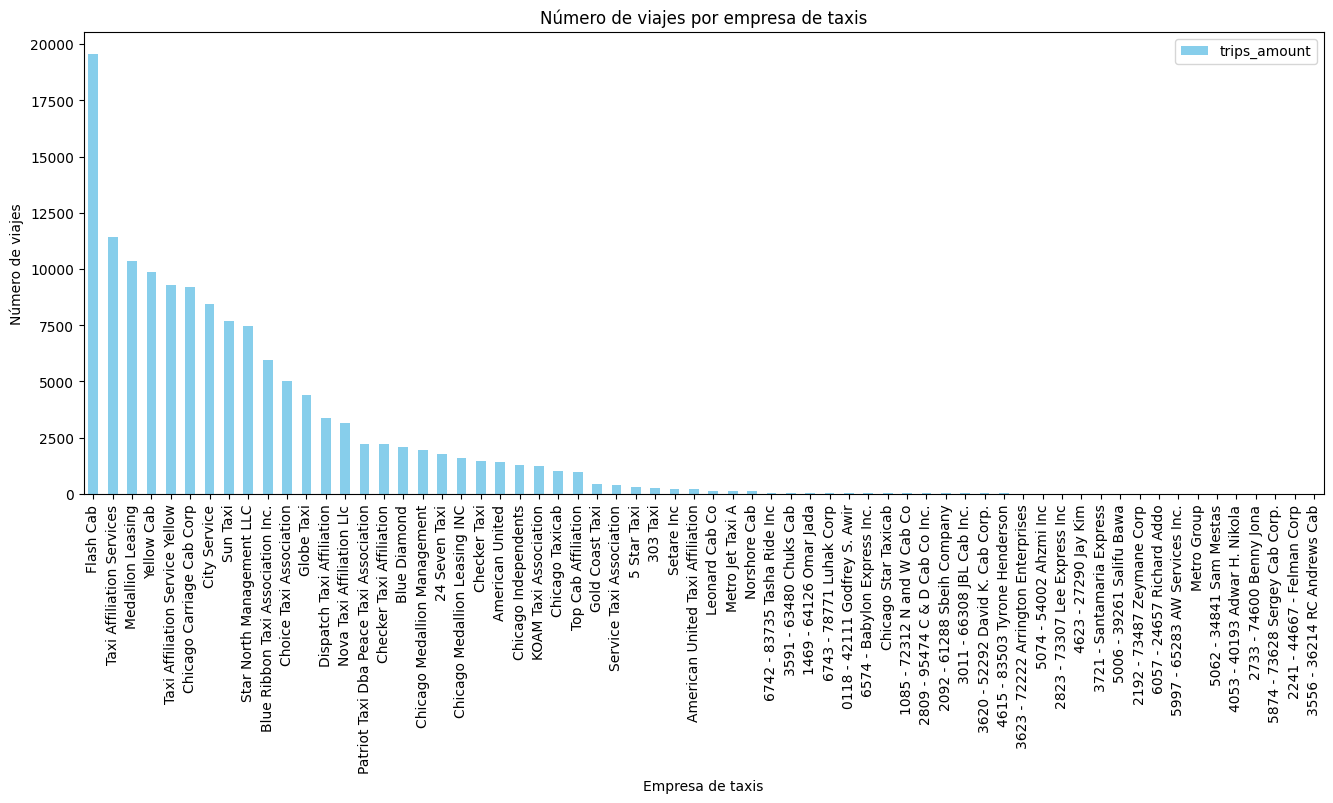

In [12]:
# Gráfico de barras para las empresas de taxis y número de viajes

df_trips.plot(x='company_name' ,kind='bar', color='skyblue',figsize=(16, 6))
plt.title('Número de viajes por empresa de taxis')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.xticks(rotation=90)
plt.show()


Podemos ver que entre más a la derecha nos ubicamos en la gráfica, los valores son tan pequeños en comparación con los primeros, que no se ven graficados y se debe incluir su valor numérico dentro de la etiqueta en el eje x.

Flash Cab es por mucho la compañía con mayor demanda en la ciudad.

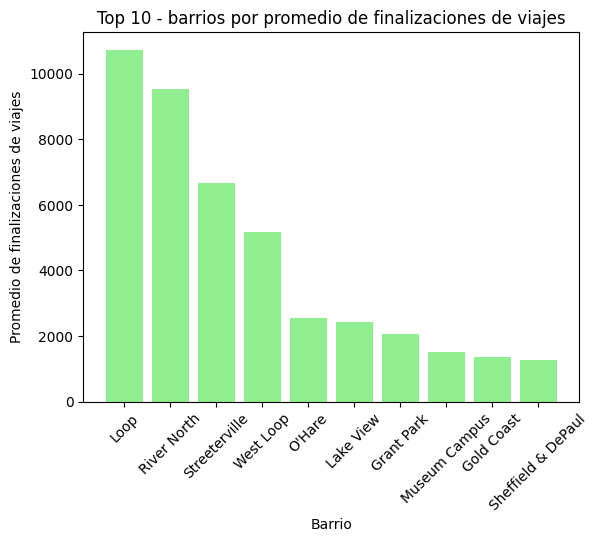

In [13]:
# Gráfico de barras para los 10 barrios principales por número de finalizaciones

plt.bar(top_neighborhoods['dropoff_location_name'], top_neighborhoods['average_trips'], color='lightgreen')
plt.title('Top 10 - barrios por promedio de finalizaciones de viajes')
plt.xlabel('Barrio')
plt.ylabel('Promedio de finalizaciones de viajes')
plt.xticks(rotation=45)
plt.show()



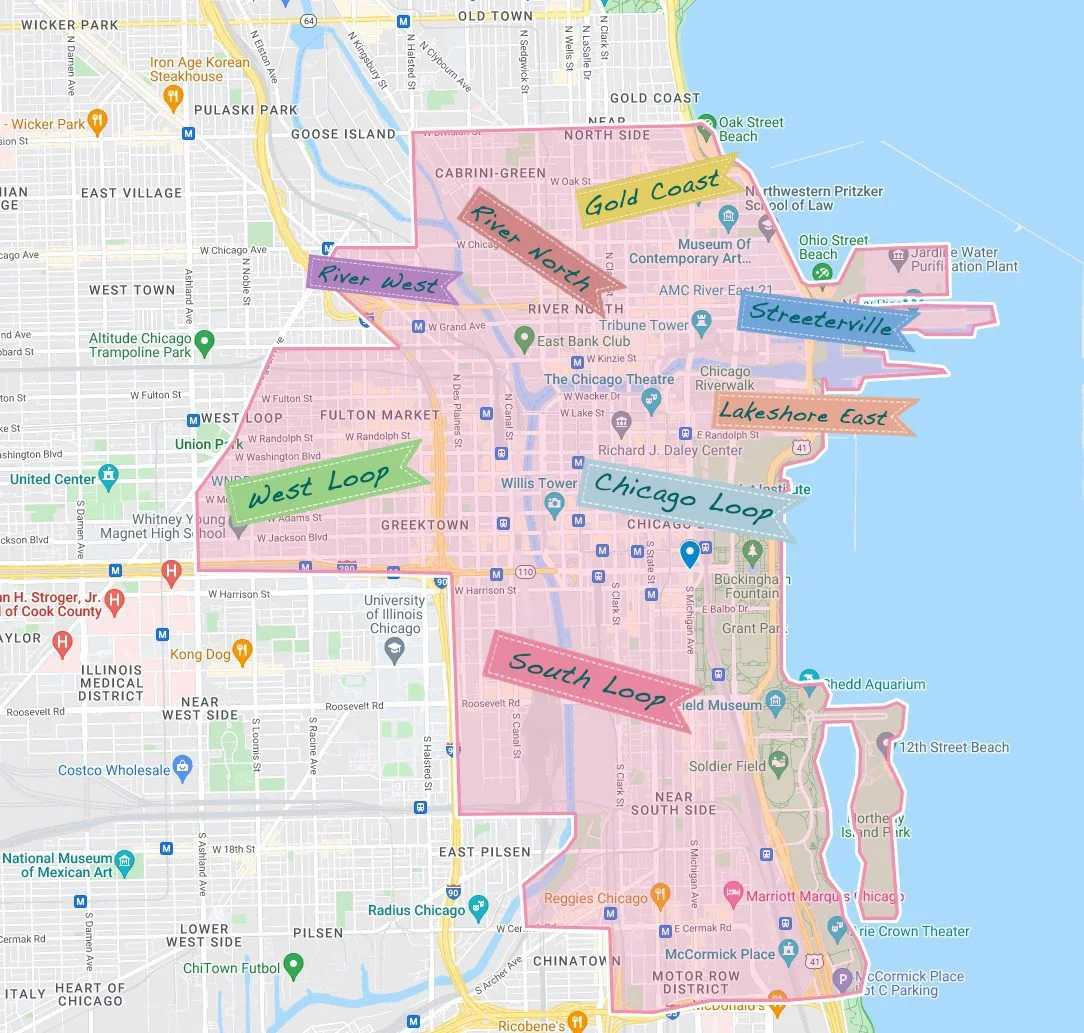

Haciendo un poco de búsqueda en internet, para observar el mapa, podemos ver que los 4 principales destinos (barrios en donde se finalizan los viajes) se encuentran todos en un área cercana. En conjunto con una breve investigación en internet nos confirma que es la zona de mayor afluencia turística (Hotspot).

## Paso 5. Prueba de hipótesis (Python)

### Paso 1: Cargar y Filtrar los Datos


Nuevamente importaremos los archivos y nos aseguraremos de contar con el tipo de datos adecuados para trabajar con ellos.

In [14]:
df_loop = pd.read_csv("/datasets/project_sql_result_07.csv")

In [32]:
df_loop

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
df_loop.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [18]:
# Convertir la columna 'start_ts' a datetime

df_loop["start_ts"] = pd.to_datetime(df_loop["start_ts"])

In [19]:
#Verificamos los cambios

df_loop.dtypes

start_ts              datetime64[ns]
weather_conditions            object
duration_seconds             float64
dtype: object

In [30]:
# Filtrar los sábados lluviosos

df_rainy_saturdays = df_loop[(df_loop['weather_conditions']== "Bad")]


In [31]:
df_rainy_saturdays

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [33]:
# Filtrar los datos para días con buen clima

df_good_saturdays = df_loop[(df_loop['weather_conditions']== "Good")]


In [47]:
df_good_saturdays

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [35]:
# Duraciones de los viajes

duration_rainy_saturdays = df_rainy_saturdays['duration_seconds']
duration_good_saturdays = df_good_saturdays['duration_seconds']

### Paso 2: Definir las Hipótesis

Hipótesis nula (𝐻0): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO CAMBIA en los sábados lluviosos.


Hipótesis alternativa (𝐻1): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SI CAMBIA en los sábados lluviosos. Esto significa que la duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio de los viajes en otros días.


### Paso 3: Realizar la Prueba T de Dos Muestras

Usaremos una prueba t de dos muestras (ttest) para comparar las medias de dos grupos independientes: los viajes en sábados lluviosos y los viajes en sábado cuando hace buen clima.

Nivel de significación (alfa): Estableceremos ALFA en 0.05, que es un nivel de significación comúnmente usado y que nos genera confianza.

In [39]:
# Prueba ttest para dos muestras

t_stat, p_value = st.ttest_ind(duration_rainy_saturdays, duration_good_saturdays, equal_var=False)

# Nivel de significación de la prueba ttest
alpha = 0.05

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes cambia en los sábados lluviosos.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que la duración promedio de los viajes cambia en los sábados lluviosos.")

t-statistic: 7.186034288068629
p-value: 6.738994326108734e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes cambia en los sábados lluviosos.


#### Ahora, vamos a visualizar las distribuciones de las duraciones de los viajes en sábados lluviosos VS otros días con buen clima.

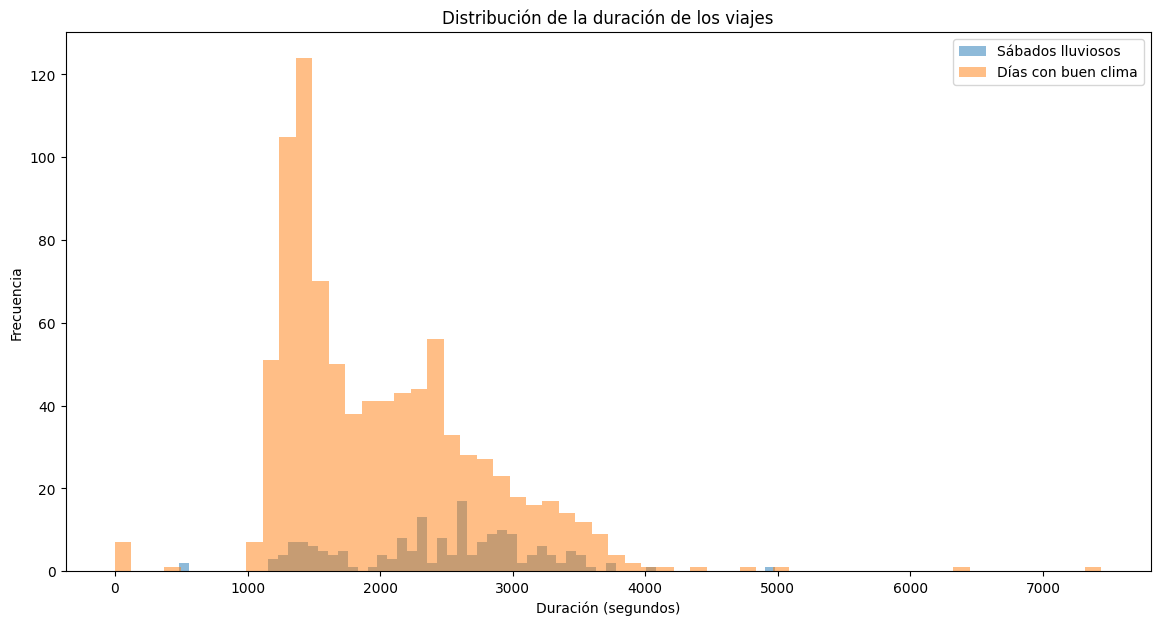

In [46]:
plt.figure(figsize=(14, 7))

plt.hist(duration_rainy_saturdays, bins=60, alpha=0.5, label='Sábados lluviosos')
plt.hist(duration_good_saturdays, bins=60, alpha=0.5, label='Sábados con buen clima')

plt.title('Distribución de la duración de los viajes')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

In [50]:
print(f"Promedio de duración por viaje para sábados lluviosos: {df_rainy_saturdays.mean()} ")

print(f"Promedio de duración por viaje para sábados con buen clima: {df_good_saturdays.mean()}")

Promedio de duración por viaje para sábados lluviosos: duration_seconds    2427.205556
dtype: float64 
Promedio de duración por viaje para sábados con buen clima: duration_seconds    1999.675676
dtype: float64


En la gráfica podemos observar que los sábados lluviosos existe menor frecuencia de viajes, pero que estos tienen un promedio mayor que los sábados con buen clima. 

Podemos apreciar como para los sábados lluviosos contamos con una distribución binomial, encontrando el punto más alto en un valor aproximado de 2700 segundos. 

Mientras que para nuestro histograma de días con buen clima, tenemos una distribución sesgada a la derecha; encontramos su punto máximo en un valor aproximado de 1400 segundos.

## CONCLUSIONES 


Luego de analizar detenidamente los patrones que siguen los viajes. Comprendemos mejor las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Como expusimos en algún punto del proyecto, podemos ver el "Hotspot" o la zona más concurrida de la ciudad.
Igualmente logramos identidficar la preferencia de los usuarios hacia el uso de la empresa "Flash Cab", por lo que si indagamos un poco en su servicio y los diferenciadores de esta, podríamos intentar replicar las mejores prácticas de su modelo.

Y finalmente, comprobamos el impacto de los factores externos en los viajes. Pues vimos que los viajes en condiciones climáticas de lluvia, son menos y son más tardados. 
Así que podríamos sugerir a los usuarios de Chicago, con una alerta conectada al servicio de pronóstico de clima, que si van a realizar un viaje, tomen al menos 10 minutos de holgura.